In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mkl

mkl.set_num_threads(4)
np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [11]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    width = cols_count * (tile_width + space_between_tiles)
    height = rows_count * (tile_height + space_between_tiles)
    
    img_matrix = np.empty(shape=(height, width))
    img_matrix.fill(np.nan)

    for row_idx in range(rows_count):
        curr_row_pos = row_idx * (tile_width + space_between_tiles)
        
        for col_idx in range(cols_count):
            curr_col_pos = col_idx * (tile_height + space_between_tiles)
            
            img_matrix[curr_row_pos:curr_row_pos + tile_width,
                       curr_col_pos:curr_col_pos + tile_height] = examples[row_idx, col_idx]
    
    return img_matrix

## MNIST Dataset

Mnist dataset has: 60000 images.
Image dimensions: 28 x 28
Reduced Mnist dataset has: 288 images.


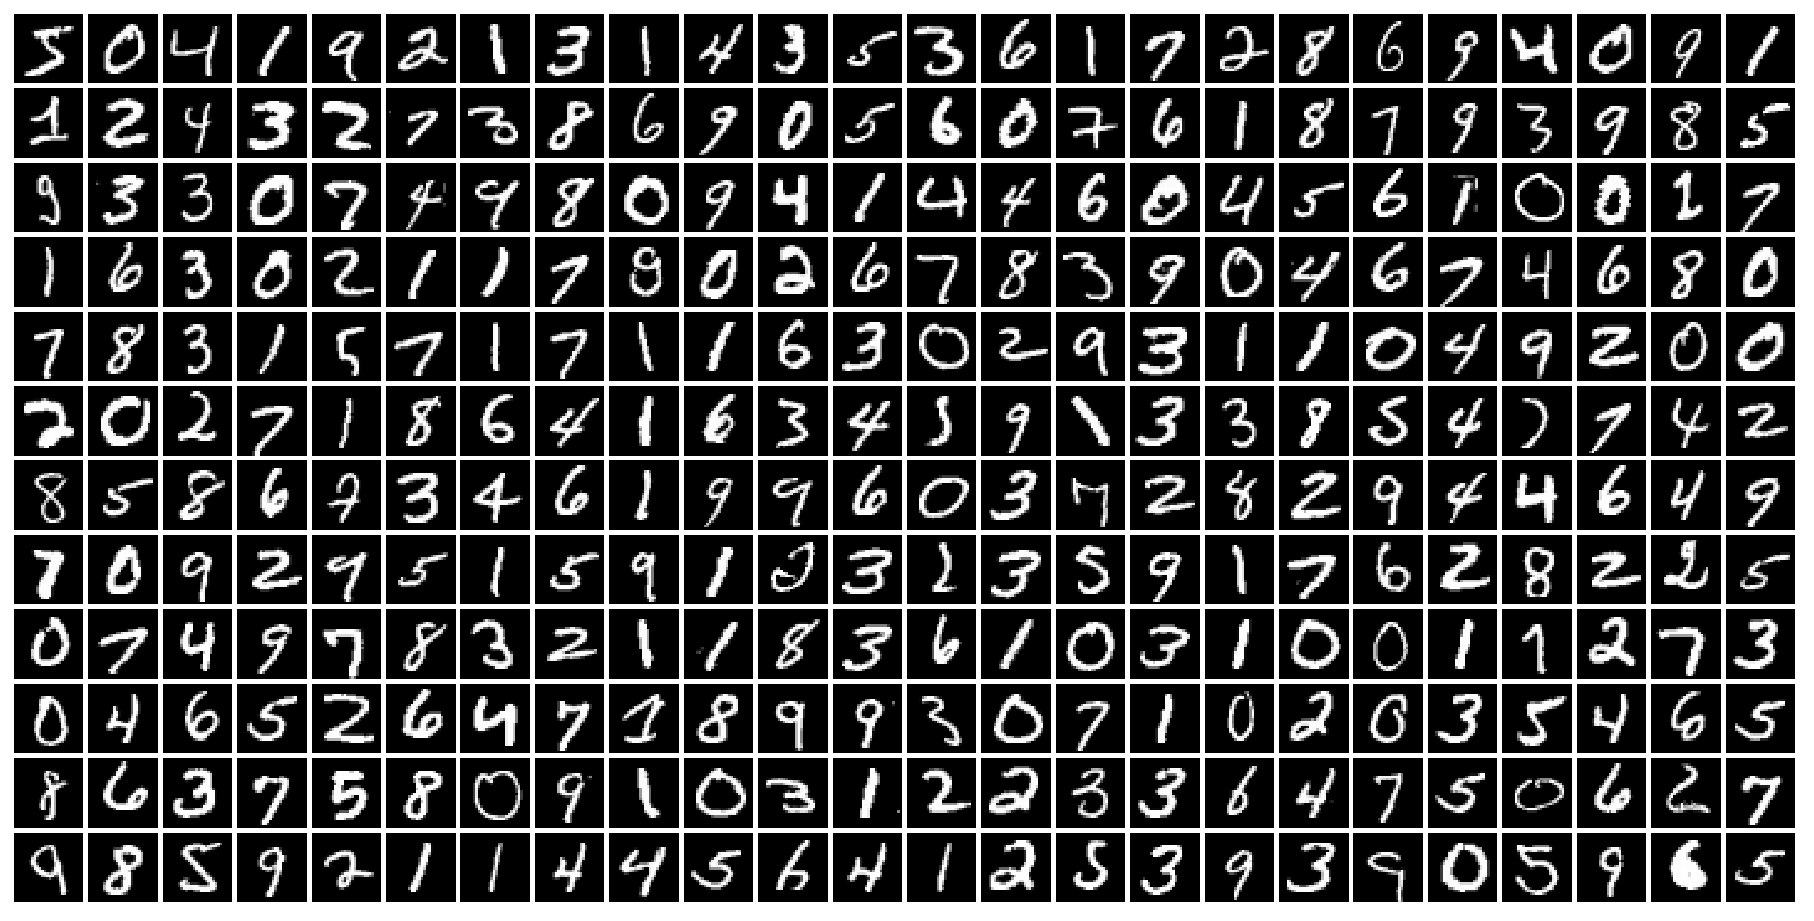

In [29]:
import mnist

print(f"Mnist dataset has: {mnist.train_images().shape[0]} images.")
print(f"Image dimensions: {mnist.train_images().shape[1]} x {mnist.train_images().shape[2]}")

digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
print(f"Reduced Mnist dataset has: {mnist.train_images()[:12*24].shape[0]} images.")

img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [35]:
print(f"Original mnist images dtype: {mnist.train_images().dtype}")
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

Original mnist images dtype: uint8


(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [42]:
# -1 in reshape: automatically determine shape by inferring from the specified values of other dimensions
X = X.reshape(X.shape[0], -1)

In [43]:
X.shape

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displys the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [77]:
import inspect

def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    # 10 digits in mnist dataset - [0, 1, 2, 3, ... 8, 9]
    for i in range(10): 
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"Digit {i}")
        

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Principal Component Analysis (PCA)

In [78]:
SAMPLES_LIMIT = 2000
print(X.shape)
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

(60000, 784)


Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [79]:
# %pip install sklearn
from sklearn.decomposition import PCA

print(f"Mnist dataset has been reduced from {X.shape[0]} to {X_small.shape[0]} images.")

pca = PCA(n_components=2)
print(f"Using {pca} to embed X_small in {pca.n_components} dimensions...")
X_pca_embedded = pca.fit_transform(X_small)
print(f"X_small embedded to: {X_pca_embedded.shape} shape.")

Mnist dataset has been reduced from 60000 to 2000 images.
Using PCA(n_components=2) to embed X_small in 2 dimensions...
X_small embedded to: (2000, 2) shape.


In [63]:
X_pca_embedded.shape

(2000, 2)

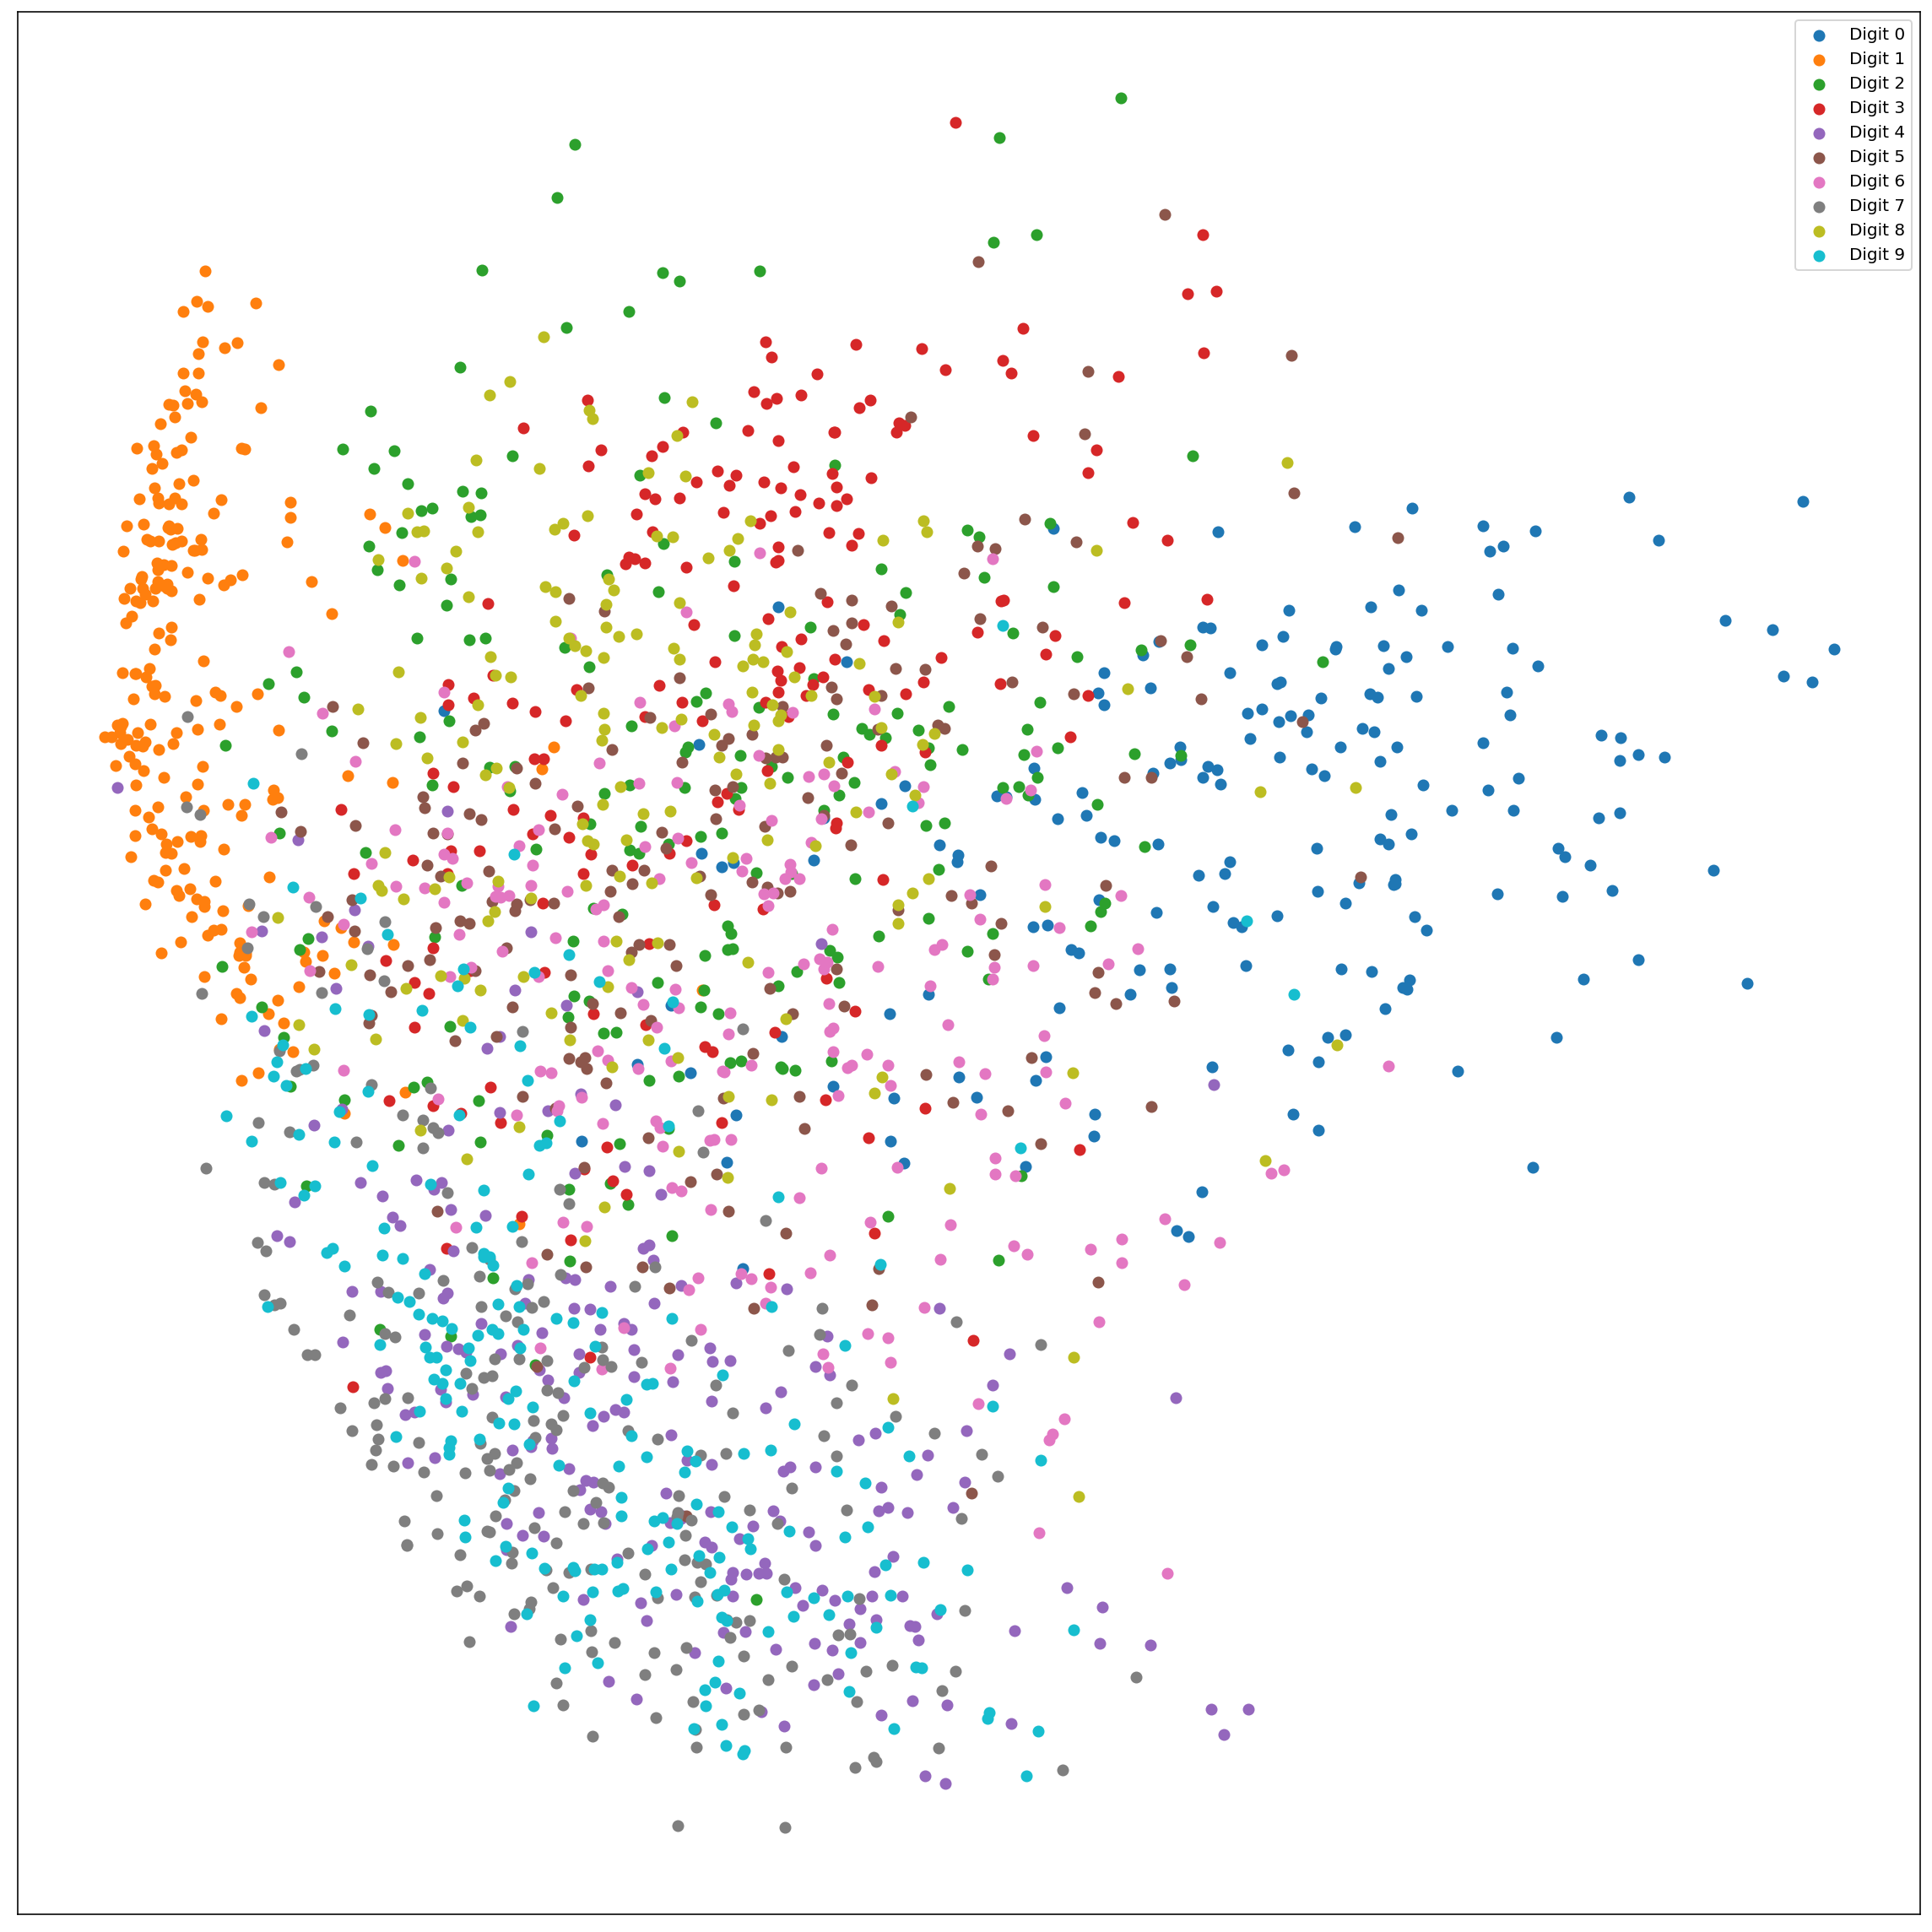

In [80]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [81]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small)

C:\Users\msmen\anaconda3\envs\NeuralNetworksAndDeepLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\msmen\anaconda3\envs\NeuralNetworksAndDeepLearning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528207
[t-SNE] Computed conditional probabilities in 0.046s
[t-SNE] Iteration 50: error = 78.0281754, gradient norm = 0.0120483 (50 iterations in 0.468s)
[t-SNE] Iteration 100: error = 76.5219574, gradient norm = 0.0372637 (50 iterations in 0.473s)
[t-SNE] Iteration 150: error = 75.6686172, gradient norm = 0.0015441 (50 iterations in 0.374s)
[t-SNE] Iteration 200: error = 75.6700134, gradient norm = 0.0018169 (50 iterations in 0.373s)
[t-SNE] Iteration 250: error = 75.6700897, gradient norm = 0.0137874 (50 iterations in 0.367s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.670090
[t-SNE] Iteration 300: error = 1.4914868, gradient norm = 0.0010505 (50 iterations in 0.355s)

In [82]:
X_tsne_embedded.shape

(2000, 2)

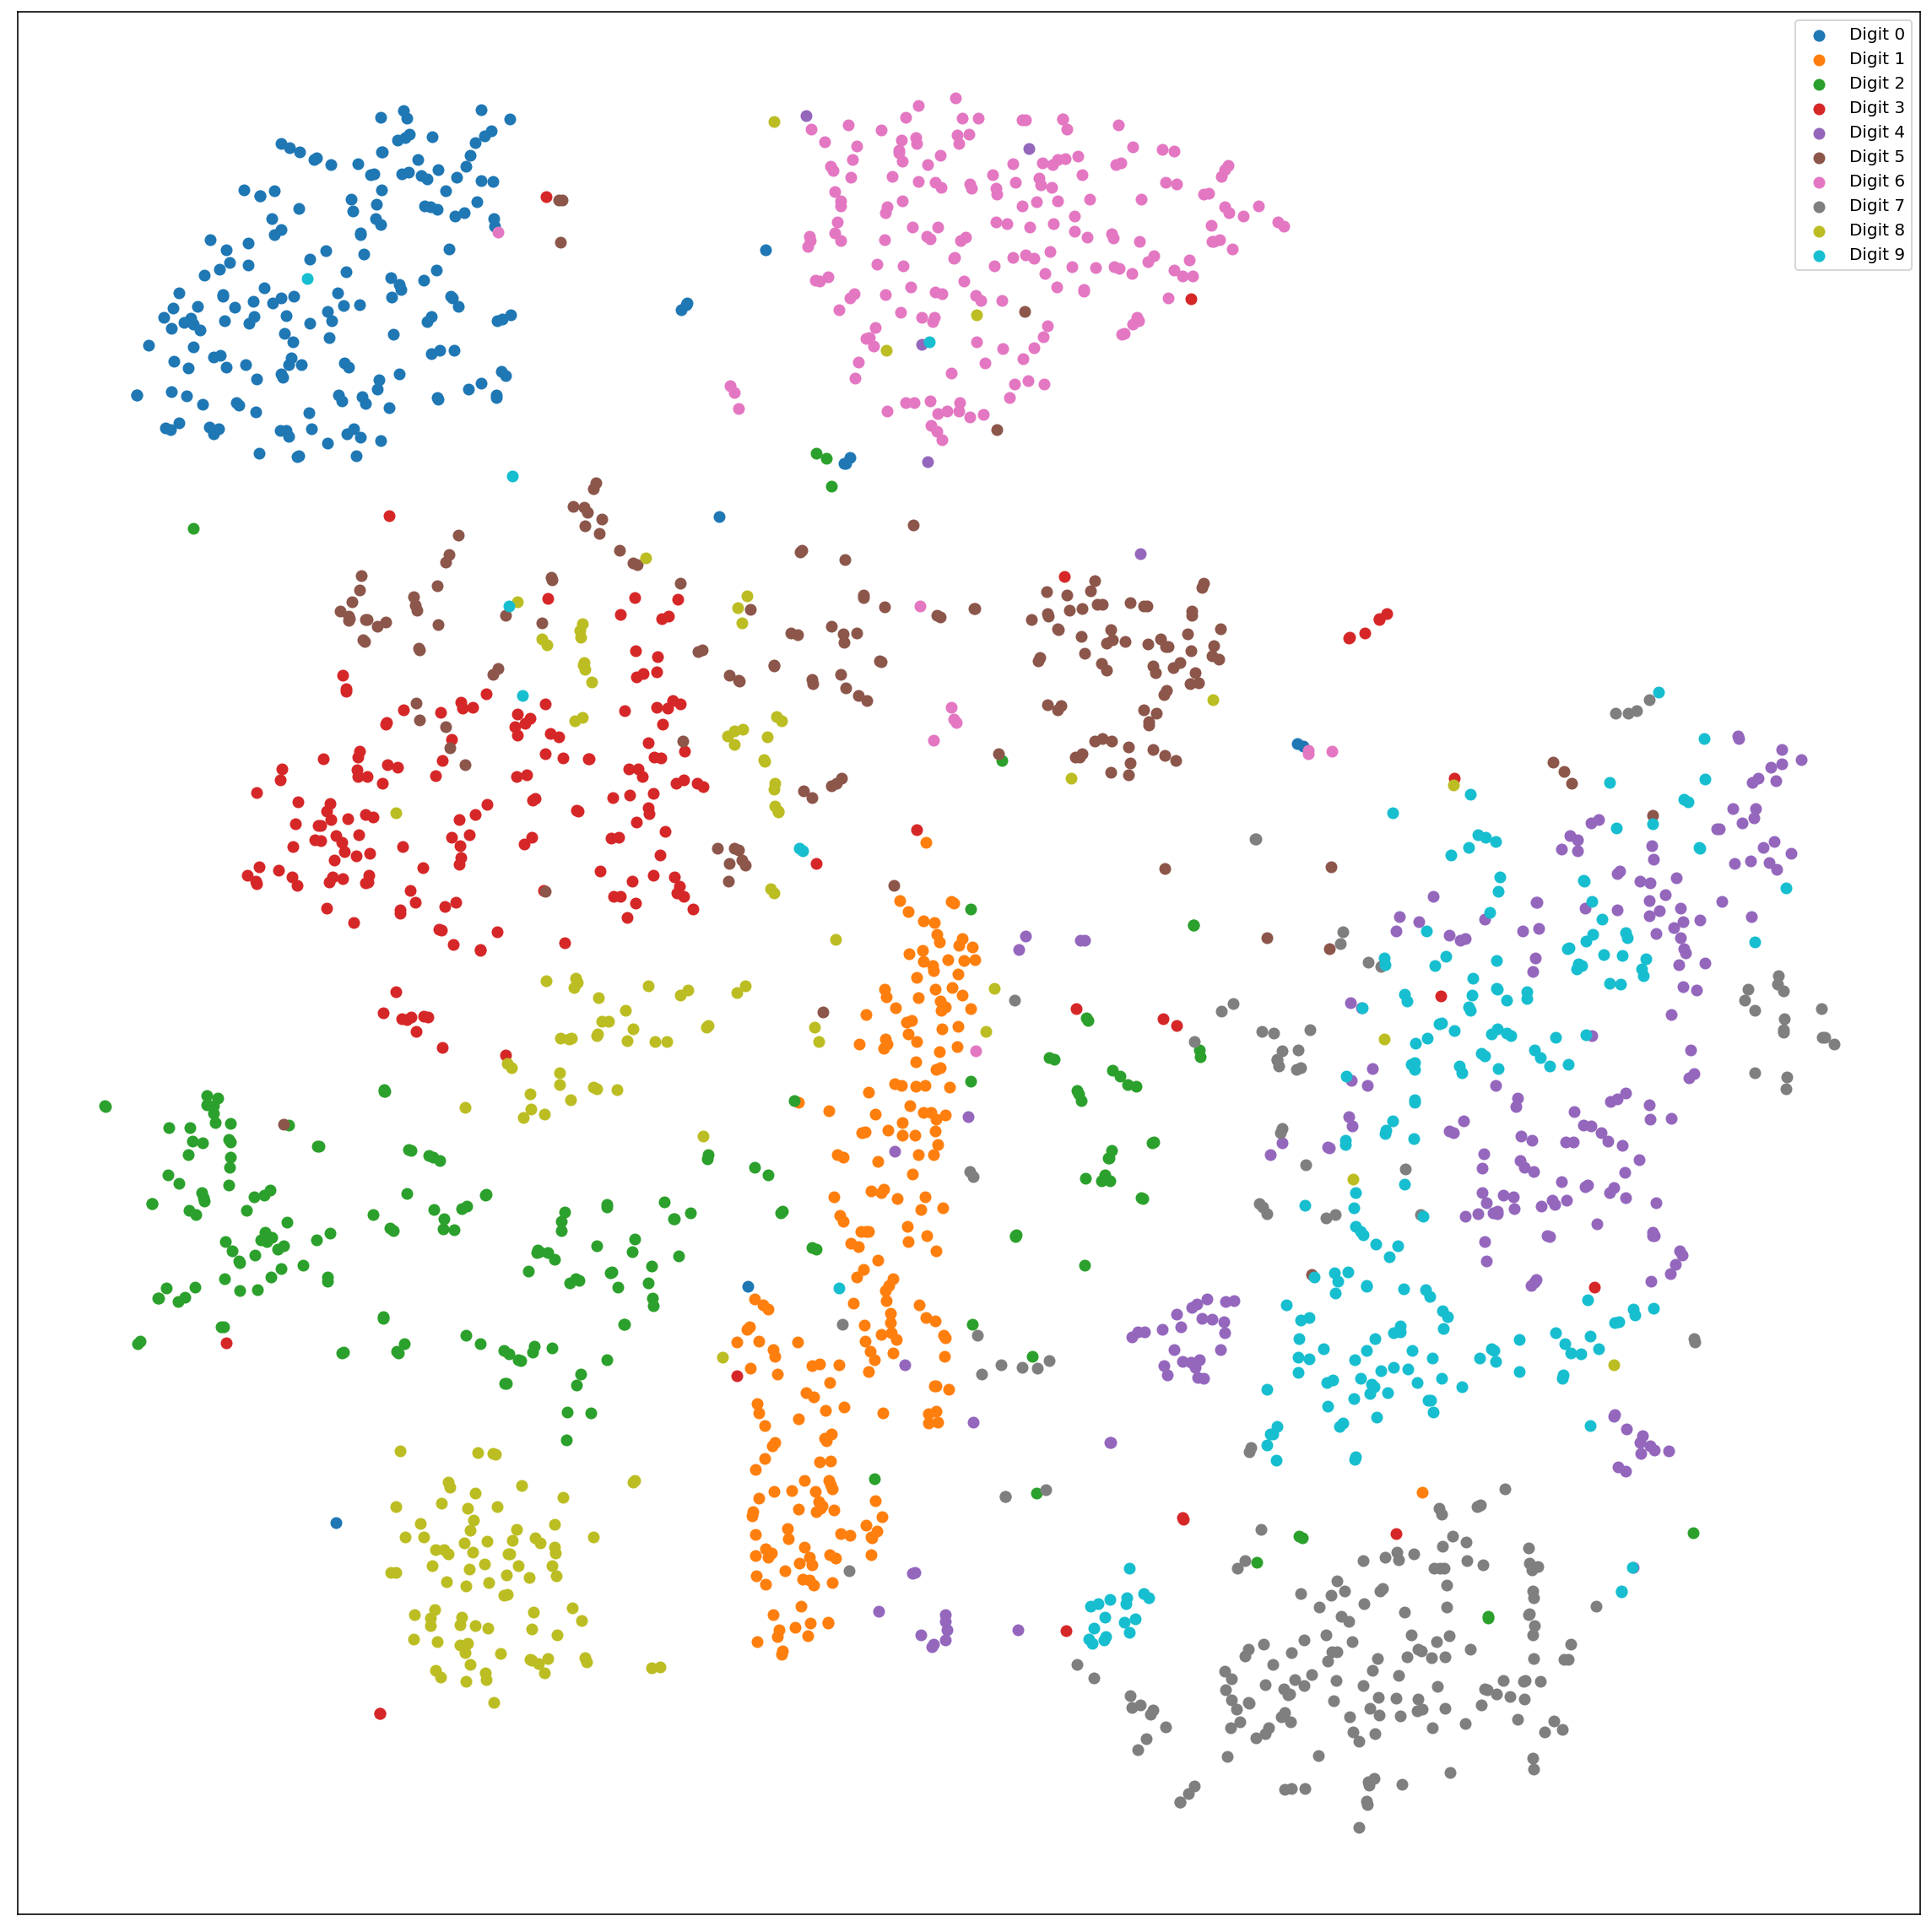

In [83]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [98]:
# %pip install plotly
# %pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name="Digit " + str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [93]:
pca_3d = PCA(n_components=3)
X_3d_pca_embedded = pca_3d.fit_transform(X_small, y_small)

In [94]:
X_3d_pca_embedded.shape

(2000, 3)

In [97]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

## Classification task

In [99]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [108]:
X.shape

(60000, 784)

In [101]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

X_train shape: (8000, 784)


In [104]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 784)
y_train shape: (8000,)
X_test shape: (2000, 784)
y_test shape: (2000,)


In [105]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, gamma=0.001):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       187
           1       0.90      0.97      0.94       221
           2       0.93      0.89      0.91       187
           3       0.89      0.86      0.87       202
           4       0.91      0.93      0.92       200
           5       0.92      0.86      0.89       188
           6       0.93      0.95      0.94       187
           7       0.93      0.93      0.93       219
           8       0.93      0.89      0.91       184
           9       0.89      0.92      0.90       225

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [107]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[184   0   0   0   1   0   0   0   2   0]
 [  0 215   1   1   1   1   0   2   0   0]
 [  3   6 166   1   3   0   4   0   4   0]
 [  2   3   4 173   0   9   0   5   3   3]
 [  0   2   1   0 186   0   2   2   0   7]
 [  1   4   1  13   1 162   4   0   1   1]
 [  1   1   2   1   1   4 177   0   0   0]
 [  1   2   1   0   3   0   0 203   1   8]
 [  1   4   2   3   1   0   3   1 163   6]
 [  2   1   0   2   7   0   0   6   1 206]]


## Appendix: Technical Insights

In [2]:
# Boolean indexing in NumPy
import numpy as np

a = np.array([4, 6, 8])
b = np.array([True, True, False])

a[b]

array([4, 6])

In [8]:
digits = np.array([1, 2, 3, 4, 1, 2, 3, 1, 2, 1])
indexes_with_ones = digits == 1
print(len(digits[indexes_with_ones]))

4
